In [1]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/adity/Downloads/DATASET/medium/Average car prices - Brazil/fipe_2022.csv")
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [3]:
inputs = df.drop(['fipe_code', 'authentication','avg_price_brl','age_years'],axis='columns')
target = df[['avg_price_brl','age_years']]

from sklearn.preprocessing import LabelEncoder

le_month_of_reference = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
inputs['model_n']= le_model.fit_transform(inputs['model'])
inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

inputs_n= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
inputs_n.head()

,year_of_reference,engine_size,year_model,month_of_reference_n,brand_n,model_n,fuel_n,gear_n
0,2022,3.0,1995,4,2,3707,2,1
1,2022,3.0,1994,4,2,3707,2,1
2,2022,3.0,1993,4,2,3707,2,1
3,2022,3.0,1992,4,2,3707,2,1
4,2022,3.0,1991,4,2,3707,2,1


In [4]:

# # Load dataset
# data = load_iris()
# X = data.data
# y = data.target

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)


In [5]:
# Step 1: Train Random Forest for multi-output regression
rf = RandomForestRegressor()
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(x_train, y_train)

# Step 2: Get predictions from the Random Forest
rf_train_preds = multi_rf.predict(x_train)
rf_test_preds = multi_rf.predict(x_test)

In [6]:
x_train_combined = np.hstack((x_train, rf_train_preds))
x_test_combined = np.hstack((x_test, rf_test_preds))

In [ ]:
# Step 4: Train the SVM model using the combined features
svr = MultiOutputRegressor(make_pipeline(StandardScaler(), SVR(kernel='rbf')))
svr.fit(x_train_combined, y_train)

# Step 5: Predict using the SVM on the test set
y_pred = svr.predict(x_test_combined)

# Evaluate performance (mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [17]:

# # Define base models
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# svm = SVC(probability=True, random_state=42)  # SVM needs probability=True for stacking

# # Define Stacking classifier
# stacked_clf = StackingClassifier(
#     estimators=[('rf', rf), ('svm', svm)],
#     final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)  # You can use any classifier here
# )

# # Train the stacking model
# stacked_clf.fit(X_train, y_train)

# # Make predictions and evaluate
# y_pred = stacked_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Stacking Classifier Accuracy:", accuracy)


Training and evaluating models...

Training Linear Regression...

Training Decision Tree...

Training SVM...


C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Training Random Forest...

Performing K-means clustering analysis...

Model Performance Summary:
--------------------------------------------------

Linear Regression:
Training Time: 0.20 seconds
R² Score (Price): 0.2524
R² Score (Age): 1.0000
MSE (Price): 73401499643.41
MSE (Age): 0.00
MAE (Price): 111161.47
MAE (Age): 0.00

Decision Tree:
Training Time: 0.84 seconds
R² Score (Price): 0.9643
R² Score (Age): 0.9767
MSE (Price): 3503036168.95
MSE (Age): 1.99
MAE (Price): 23057.15
MAE (Age): 1.00

SVM:
Training Time: 70.72 seconds
R² Score (Price): -18.0053
R² Score (Age): 0.9956
MSE (Price): 1866091856412.94
MSE (Age): 0.38
MAE (Price): 1350324.69
MAE (Age): 0.51

Random Forest:
Training Time: 15.94 seconds
R² Score (Price): 0.9980
R² Score (Age): 0.9999
MSE (Price): 192494849.46
MSE (Age): 0.01
MAE (Price): 3097.10
MAE (Age): 0.02


C:\Users\adity\AppData\Local\Temp\ipykernel_18988\3051090806.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\adity\AppData\Local\Temp\ipykernel_18988\3051090806.py:140: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\adity\AppData\Local\Temp\ipykernel_18988\3051090806.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


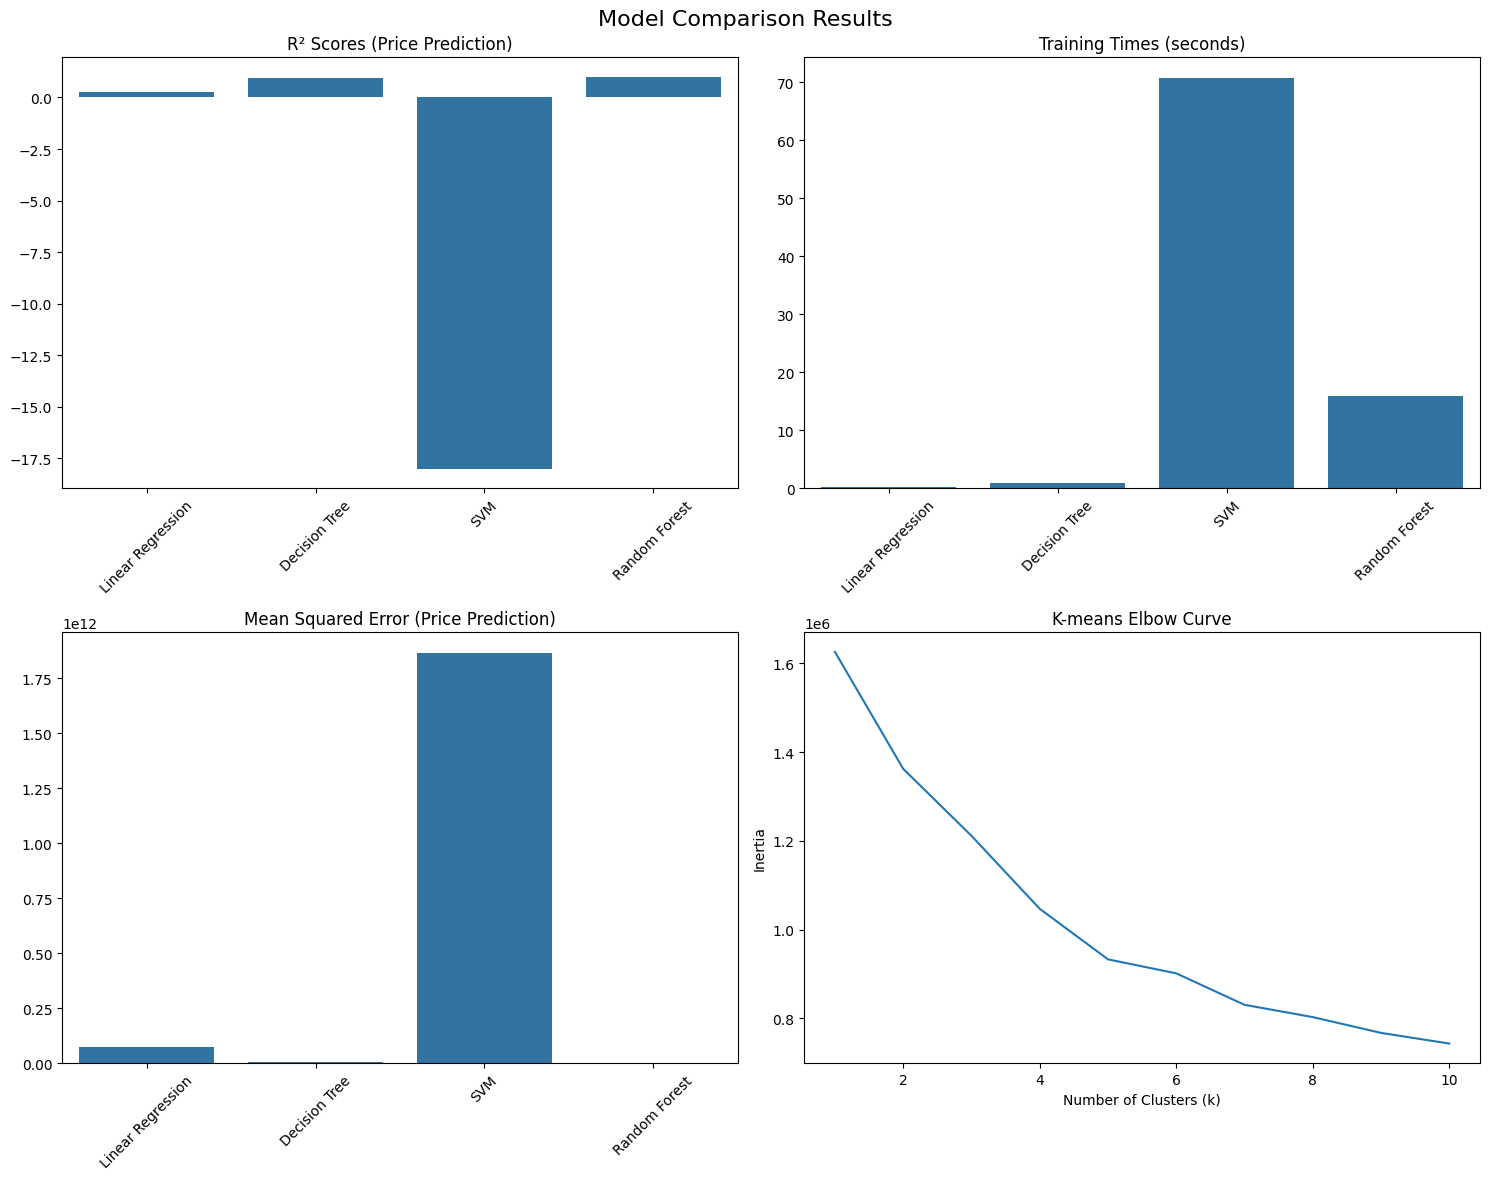

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Set random seed for reproducibility
np.random.seed(42)

class ModelComparison:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.models = {}
        self.results = {}
        self.X = None
        self.y = None
        self.setup_data()
        
    def setup_data(self):
        # Prepare features and targets
        
        inputs = self.df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
        self.y = self.df[['avg_price_brl', 'age_years']]
        
 #----------------- 
        from sklearn.preprocessing import LabelEncoder

        le_month_of_reference = LabelEncoder()
        le_brand = LabelEncoder()
        le_model = LabelEncoder()
        le_fuel = LabelEncoder()
        le_gear = LabelEncoder()

        inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
        inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
        inputs['model_n']= le_model.fit_transform(inputs['model'])
        inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
        inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

        self.X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#         inputs_n.head()
#--------------------------------------------------------- 



        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Scale the features
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
    def initialize_models(self):
        self.models = {
            'Linear Regression': MultiOutputRegressor(LinearRegression()),
            'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
            'SVM': MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1, max_iter=1000)),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        }
        
    def train_and_evaluate(self):
        print("\nTraining and evaluating models...")
        
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            start_time = time()
            
            # Train the model
            model.fit(self.X_train_scaled, self.y_train)
            
            # Make predictions
            y_pred = model.predict(self.X_test_scaled)
            
            # Calculate metrics
            training_time = time() - start_time
            mse = mean_squared_error(self.y_test, y_pred, multioutput='raw_values')
            mae = mean_absolute_error(self.y_test, y_pred, multioutput='raw_values')
            r2 = r2_score(self.y_test, y_pred, multioutput='raw_values')
            
            self.results[name] = {
                'training_time': training_time,
                'mse': mse,
                'mae': mae,
                'r2': r2,
                'predictions': y_pred
            }
            
    def add_kmeans_analysis(self):
        print("\nPerforming K-means clustering analysis...")
        
        # Determine optimal number of clusters using elbow method
        inertias = []
        K = range(1, 11)
        for k in K:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(self.X_train_scaled)
            inertias.append(kmeans.inertia_)
        
        # Use optimal k (you might want to adjust this based on the elbow curve)
        optimal_k = 4
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        cluster_labels = kmeans.fit_predict(self.X_train_scaled)
        
        self.results['KMeans'] = {
            'cluster_labels': cluster_labels,
            'inertias': inertias
        }
        
    def plot_results(self):
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Model Comparison Results', fontsize=16)
        
        # Plot 1: R² scores
        r2_scores = {name: result['r2'][0] for name, result in self.results.items() 
                    if 'r2' in result}
        ax = axes[0, 0]
        sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), ax=ax)
        ax.set_title('R² Scores (Price Prediction)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Plot 2: Training times
        times = {name: result['training_time'] for name, result in self.results.items() 
                if 'training_time' in result}
        ax = axes[0, 1]
        sns.barplot(x=list(times.keys()), y=list(times.values()), ax=ax)
        ax.set_title('Training Times (seconds)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Plot 3: MSE comparison
        mse_scores = {name: result['mse'][0] for name, result in self.results.items() 
                     if 'mse' in result}
        ax = axes[1, 0]
        sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), ax=ax)
        ax.set_title('Mean Squared Error (Price Prediction)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Plot 4: K-means elbow curve
        if 'KMeans' in self.results:
            ax = axes[1, 1]
            ax.plot(range(1, 11), self.results['KMeans']['inertias'])
            ax.set_title('K-means Elbow Curve')
            ax.set_xlabel('Number of Clusters (k)')
            ax.set_ylabel('Inertia')
        
        plt.tight_layout()
        plt.show()
        
    def print_summary(self):
        print("\nModel Performance Summary:")
        print("-" * 50)
        
        for name, result in self.results.items():
            if 'r2' in result:
                print(f"\n{name}:")
                print(f"Training Time: {result['training_time']:.2f} seconds")
                print(f"R² Score (Price): {result['r2'][0]:.4f}")
                print(f"R² Score (Age): {result['r2'][1]:.4f}")
                print(f"MSE (Price): {result['mse'][0]:.2f}")
                print(f"MSE (Age): {result['mse'][1]:.2f}")
                print(f"MAE (Price): {result['mae'][0]:.2f}")
                print(f"MAE (Age): {result['mae'][1]:.2f}")

    def run_comparison(self):
        self.initialize_models()
        self.train_and_evaluate()
        self.add_kmeans_analysis()
        self.print_summary()
        self.plot_results()

# Usage example
def run_model_comparison(data_path):
    comparison = ModelComparison(data_path)
    comparison.run_comparison()
    return comparison

# Run the comparison
if __name__ == "__main__":
    # Replace with your CSV file path
    data_path = 'C:/Users/adity/Downloads/DATASET/medium/Average car prices - Brazil/fipe_2022.csv'
    model_comparison = run_model_comparison(data_path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Set random seed for reproducibility
np.random.seed(42)

# Add custom K-means regressor class
class KMeansRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_clusters=8):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.cluster_regressors = None
        
    def fit(self, X, y):
        # Fit K-means
        self.kmeans.fit(X)
        cluster_labels = self.kmeans.predict(X)
        
        # Train a regressor for each cluster
        self.cluster_regressors = []
        for i in range(self.n_clusters):
            mask = (cluster_labels == i)
            if np.sum(mask) > 0:
                regressor = LinearRegression()
                regressor.fit(X[mask], y[mask])
                self.cluster_regressors.append(regressor)
            else:
                self.cluster_regressors.append(None)
        return self
    
    def predict(self, X):
        cluster_labels = self.kmeans.predict(X)
        predictions = np.zeros((X.shape[0], 2))  # Assuming 2 target variables
        
        for i in range(self.n_clusters):
            mask = (cluster_labels == i)
            if np.sum(mask) > 0 and self.cluster_regressors[i] is not None:
                predictions[mask] = self.cluster_regressors[i].predict(X[mask])
        
        return predictions

class ModelComparison:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.models = {}
        self.results = {}
        self.X = None
        self.y = None
        self.setup_data()
        
    def setup_data(self):
        # Prepare features and targets
        inputs = self.df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
        self.y = self.df[['avg_price_brl', 'age_years']]
        
        
         #----------------- 
        from sklearn.preprocessing import LabelEncoder

        le_month_of_reference = LabelEncoder()
        le_brand = LabelEncoder()
        le_model = LabelEncoder()
        le_fuel = LabelEncoder()
        le_gear = LabelEncoder()

        inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
        inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
        inputs['model_n']= le_model.fit_transform(inputs['model'])
        inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
        inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

        self.X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#         inputs_n.head()
#--------------------------------------------------------- 


        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        
        # Scale the features
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
    def initialize_models(self):
        self.models = {
            'Linear Regression': MultiOutputRegressor(LinearRegression()),
            'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
            'SVM': MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1, max_iter=1000)),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
            'Naive Bayes': MultiOutputRegressor(GaussianNB()),  # Added Naive Bayes
            'K-means Regression': KMeansRegressor(n_clusters=4)  # Added K-means Regression
        }
        
    def train_and_evaluate(self):
        print("\nTraining and evaluating models...")
        
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            start_time = time()
            
            # Train the model
            model.fit(self.X_train_scaled, self.y_train)
            
            # Make predictions
            y_pred = model.predict(self.X_test_scaled)
            
            # Calculate metrics
            training_time = time() - start_time
            mse = mean_squared_error(self.y_test, y_pred, multioutput='raw_values')
            mae = mean_absolute_error(self.y_test, y_pred, multioutput='raw_values')
            r2 = r2_score(self.y_test, y_pred, multioutput='raw_values')
            
            self.results[name] = {
                'training_time': training_time,
                'mse': mse,
                'mae': mae,
                'r2': r2,
                'predictions': y_pred
            }
    
    def analyze_predictions(self):
        """Analyze prediction errors for each model"""
        for name, result in self.results.items():
            if 'predictions' in result:
                predictions = result['predictions']
                errors = predictions - self.y_test.values
                
                result['error_analysis'] = {
                    'mean_error': np.mean(errors, axis=0),
                    'std_error': np.std(errors, axis=0),
                    'max_error': np.max(np.abs(errors), axis=0)
                }
    
    def plot_results(self):
        # Create figure with subplots
        fig, axes = plt.subplots(3, 2, figsize=(15, 18))
        fig.suptitle('Model Comparison Results', fontsize=16)
        
        # Plot 1: R² scores
        r2_scores = {name: result['r2'][0] for name, result in self.results.items() 
                    if 'r2' in result}
        ax = axes[0, 0]
        sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), ax=ax)
        ax.set_title('R² Scores (Price Prediction)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Plot 2: Training times
        times = {name: result['training_time'] for name, result in self.results.items() 
                if 'training_time' in result}
        ax = axes[0, 1]
        sns.barplot(x=list(times.keys()), y=list(times.values()), ax=ax)
        ax.set_title('Training Times (seconds)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Plot 3: MSE comparison
        mse_scores = {name: result['mse'][0] for name, result in self.results.items() 
                     if 'mse' in result}
        ax = axes[1, 0]
        sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), ax=ax)
        ax.set_title('Mean Squared Error (Price Prediction)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Plot 4: Error Distribution
        ax = axes[1, 1]
        for name, result in self.results.items():
            if 'predictions' in result:
                errors = result['predictions'][:, 0] - self.y_test['avg_price_brl'].values
                sns.kdeplot(data=errors, label=name, ax=ax)
        ax.set_title('Error Distribution (Price Prediction)')
        ax.legend()
        
        # Plot 5: Actual vs Predicted
        ax = axes[2, 0]
        for name, result in self.results.items():
            if 'predictions' in result:
                ax.scatter(self.y_test['avg_price_brl'].values, 
                          result['predictions'][:, 0],
                          alpha=0.5,
                          label=name)
        ax.set_title('Actual vs Predicted Prices')
        ax.set_xlabel('Actual Price')
        ax.set_ylabel('Predicted Price')
        ax.legend()
        
        # Plot 6: Model Performance Comparison
        ax = axes[2, 1]
        model_scores = {
            name: [result['r2'][0], 1 - result['mse'][0]/np.var(self.y_test['avg_price_brl'])]
            for name, result in self.results.items() if 'r2' in result
        }
        score_df = pd.DataFrame(model_scores, index=['R²', 'Normalized Score']).T
        score_df.plot(kind='bar', ax=ax)
        ax.set_title('Model Performance Metrics')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
    def print_summary(self):
        print("\nModel Performance Summary:")
        print("-" * 50)
        
        for name, result in self.results.items():
            if 'r2' in result:
                print(f"\n{name}:")
                print(f"Training Time: {result['training_time']:.2f} seconds")
                print(f"R² Score (Price): {result['r2'][0]:.4f}")
                print(f"R² Score (Age): {result['r2'][1]:.4f}")
                print(f"MSE (Price): {result['mse'][0]:.2f}")
                print(f"MSE (Age): {result['mse'][1]:.2f}")
                print(f"MAE (Price): {result['mae'][0]:.2f}")
                print(f"MAE (Age): {result['mae'][1]:.2f}")
                
                if 'error_analysis' in result:
                    print("\nError Analysis:")
                    print(f"Mean Error (Price): {result['error_analysis']['mean_error'][0]:.2f}")
                    print(f"Std Error (Price): {result['error_analysis']['std_error'][0]:.2f}")
                    print(f"Max Error (Price): {result['error_analysis']['max_error'][0]:.2f}")

    def run_comparison(self):
        self.initialize_models()
        self.train_and_evaluate()
        self.analyze_predictions()
        self.print_summary()
        self.plot_results()

# Usage example3
def run_model_comparison(data_path):
    comparison = ModelComparison(data_path)
    comparison.run_comparison()
    return comparison

# Run the comparison
if __name__ == "__main__":
    # Replace with your CSV file path
    data_path = 'C:/Users/adity/Downloads/DATASET/medium/Average car prices - Brazil/fipe_2022.csv'
    model_comparison = run_model_comparison(data_path)


Training and evaluating models...

Training Linear Regression...

Training Decision Tree...

Training SVM...


C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Training Random Forest...

Training Naive Bayes...
